In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [4]:
data = pd.read_csv('/content/sample_data/Google_test_data.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-13,1236.979980,1249.272949,1233.640991,1235.010010,1235.010010,997300
1,2018-08-14,1235.189941,1245.869995,1225.109985,1242.099976,1242.099976,1348100
2,2018-08-15,1229.260010,1235.239990,1209.510010,1214.380005,1214.380005,1828800
3,2018-08-16,1224.729980,1226.000000,1202.550049,1206.489990,1206.489990,1343200
4,2018-08-17,1202.030029,1209.020020,1188.239990,1200.959961,1200.959961,1389600


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [6]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data = data.dropna()
trainData = data.iloc[:,4:5].values

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       252 non-null    float64
 2   High       252 non-null    float64
 3   Low        252 non-null    float64
 4   Close      252 non-null    float64
 5   Adj Close  252 non-null    float64
 6   Volume     252 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB


In [8]:
sc = MinMaxScaler(feature_range=(0,1))
trainData = sc.fit_transform(trainData)
trainData.shape

(252, 1)

In [10]:
X_train = []
y_train = []

for i in range (60,200): #60 : timestep // 1149 : length of the data
    X_train.append(trainData[i-60:i,0]) 
    y_train.append(trainData[i,0])

X_train,y_train = np.array(X_train),np.array(y_train)

In [11]:
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1)) #adding the batch_size axis
X_train.shape

(140, 60, 1)

In [12]:
model = Sequential()

model.add(LSTM(units=100, return_sequences = True, input_shape =(X_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units=100, return_sequences = False))
model.add(Dropout(0.2))

model.add(Dense(units =1))
model.compile(optimizer='adam',loss="mean_squared_error")

In [13]:
hist = model.fit(X_train, y_train, epochs = 20, batch_size = 32, verbose=2)

Epoch 1/20
5/5 - 11s - loss: 0.1340 - 11s/epoch - 2s/step
Epoch 2/20
5/5 - 1s - loss: 0.0401 - 1s/epoch - 216ms/step
Epoch 3/20
5/5 - 1s - loss: 0.0265 - 1s/epoch - 214ms/step
Epoch 4/20
5/5 - 1s - loss: 0.0252 - 1s/epoch - 214ms/step
Epoch 5/20
5/5 - 2s - loss: 0.0230 - 2s/epoch - 354ms/step
Epoch 6/20
5/5 - 2s - loss: 0.0193 - 2s/epoch - 340ms/step
Epoch 7/20
5/5 - 1s - loss: 0.0179 - 1s/epoch - 214ms/step
Epoch 8/20
5/5 - 1s - loss: 0.0165 - 1s/epoch - 216ms/step
Epoch 9/20
5/5 - 1s - loss: 0.0183 - 1s/epoch - 214ms/step
Epoch 10/20
5/5 - 1s - loss: 0.0143 - 1s/epoch - 216ms/step
Epoch 11/20
5/5 - 1s - loss: 0.0155 - 1s/epoch - 221ms/step
Epoch 12/20
5/5 - 1s - loss: 0.0137 - 1s/epoch - 214ms/step
Epoch 13/20
5/5 - 1s - loss: 0.0123 - 1s/epoch - 213ms/step
Epoch 14/20
5/5 - 1s - loss: 0.0137 - 1s/epoch - 217ms/step
Epoch 15/20
5/5 - 1s - loss: 0.0131 - 1s/epoch - 212ms/step
Epoch 16/20
5/5 - 2s - loss: 0.0145 - 2s/epoch - 361ms/step
Epoch 17/20
5/5 - 2s - loss: 0.0172 - 2s/epoch - 3

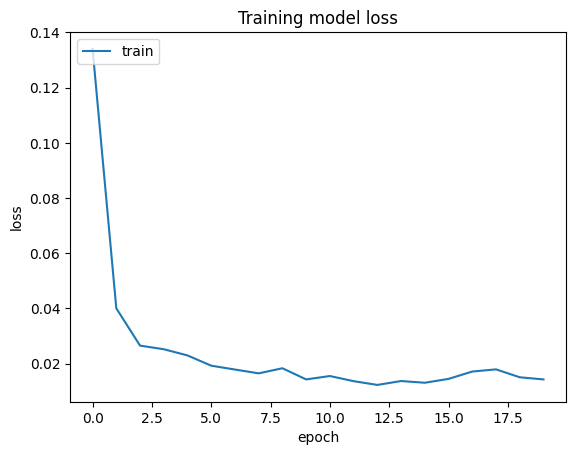

In [14]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [16]:
testData = pd.read_csv('/content/sample_data/Google_test_data.csv')
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData = testData.dropna()
testData = testData.iloc[:,4:5]
y_test = testData.iloc[60:,0:].values 
#input array for the model
inputClosing = testData.iloc[:,0:].values 
inputClosing_scaled = sc.transform(inputClosing)
inputClosing_scaled.shape
X_test = []
length = len(testData)
timestep = 60
for i in range(timestep,length):  
    X_test.append(inputClosing_scaled[i-timestep:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
X_test.shape

(192, 60, 1)

In [17]:
y_pred = model.predict(X_test)
y_pred

6/6 [==============================] - 2s 70ms/step


array([[0.29379743],
       [0.28241763],
       [0.27290997],
       [0.26585189],
       [0.2613183 ],
       [0.25864777],
       [0.25698102],
       [0.25567225],
       [0.25465122],
       [0.2540055 ],
       [0.2532112 ],
       [0.25177026],
       [0.24952808],
       [0.24635728],
       [0.24260041],
       [0.23868366],
       [0.23565601],
       [0.23455289],
       [0.23617788],
       [0.24113   ],
       [0.248706  ],
       [0.2580446 ],
       [0.26775575],
       [0.27661383],
       [0.28391865],
       [0.2895643 ],
       [0.29371902],
       [0.29633832],
       [0.29697928],
       [0.2954461 ],
       [0.29172054],
       [0.28575176],
       [0.27716917],
       [0.26571956],
       [0.25238836],
       [0.23858978],
       [0.22554824],
       [0.21413831],
       [0.20502685],
       [0.19814874],
       [0.19394487],
       [0.1927978 ],
       [0.19496053],
       [0.20042598],
       [0.2088266 ],
       [0.2193414 ],
       [0.23086432],
       [0.242

In [18]:
predicted_price = sc.inverse_transform(y_pred)

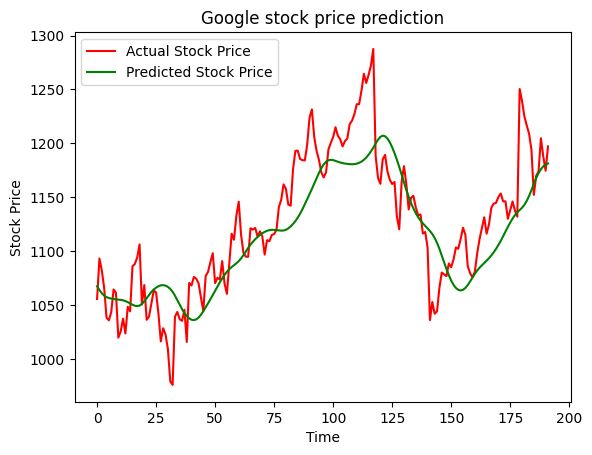

In [19]:
plt.plot(y_test, color = 'red', label = 'Actual Stock Price')
plt.plot(predicted_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()